In [13]:
import os 
import tarfile
from six.moves import urllib

In [14]:
DOWNLOAD_ROOT = "http://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"



In [15]:
def fetch_housing_data(housing_url = HOUSING_URL, housing_path=HOUSING_PATH ):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [16]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [17]:
fetch_housing_data(housing_url = HOUSING_URL, housing_path=HOUSING_PATH )

In [18]:
housing_df = load_housing_data(housing_path=HOUSING_PATH)

In [19]:
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [13]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
housing_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [15]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


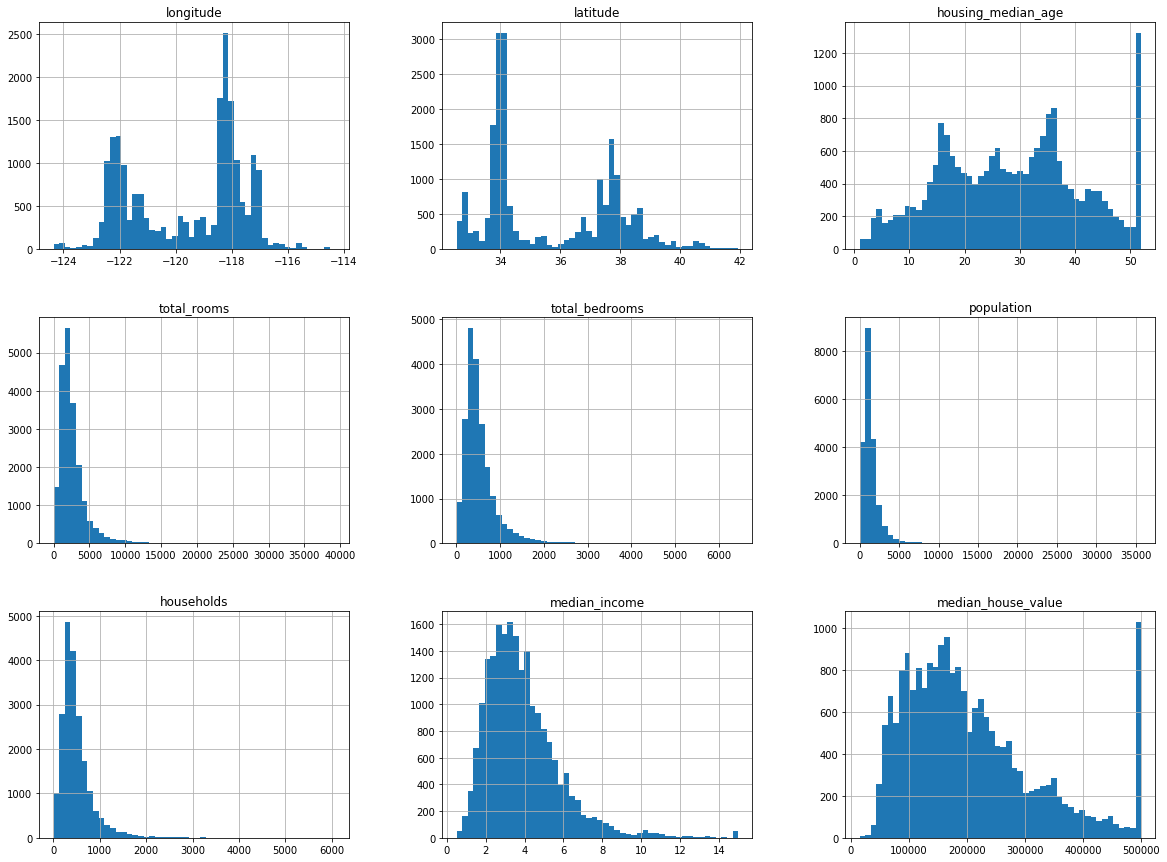

In [29]:
import matplotlib.pyplot as plt
housing_df.hist(bins =50, figsize=(20,15))
plt.show()

median income not expressed in us dollars scale from.5 to 15 3 sorta == 30000

hosiung median age and house value are capped which is not good. 

house value is label or target aka y 

options to fix, collect proper labels for the districts whose labeles were capped

remove those districts from the training set and training set 

data has very different scales needs to be scaled

histograms are tail heavy, not gausian or normal distribution much farther to right than left - this
can cuase some algs to have a hard time prediciting patterns - try to transform attributes later on have more bell-shapped distribvutions



In [30]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [34]:
# manual creation of split 

import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices] 

In [36]:
train_set, test_set = split_train_test(housing_df, 0.2)
len(train_set)

16512

In [37]:
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [38]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [39]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [40]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [42]:
housing_with_id = housing_df.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [44]:
housing_with_id["id"] = housing_df["longitude"] * 1000 + housing_df["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [45]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


In [62]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_df,test_size=.02, random_state=42)

In [63]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND,2.0
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND,2.0
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY,3.0
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN,4.0
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN,3.0
...,...,...,...,...,...,...,...,...,...,...,...
19572,-120.94,37.58,19.0,1549.0,369.0,770.0,370.0,2.0493,99500.0,INLAND,2.0
3739,-118.39,34.18,42.0,1957.0,389.0,985.0,414.0,2.9327,240200.0,<1H OCEAN,2.0
351,-122.16,37.76,45.0,2299.0,514.0,1437.0,484.0,2.5122,95500.0,NEAR BAY,2.0
10743,-117.92,33.61,37.0,1244.0,173.0,394.0,154.0,10.3682,500001.0,<1H OCEAN,5.0


random sampling of small data sets could introduce bias so want to pull representitive selection from population

if experts told you that the median income is very important to prediction housing orices you may want to ensure 
that the test set is representative of the various categories of incomes in the whole dataset. 
median income = continuous numerical attribue need to create income category attribute 


In [48]:
housing_df["income_cat"]=np.ceil(housing_df["median_income"]/1.5)
housing_df.head()
## ceil rounds up so keep whole numbers for income cat 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [51]:
# to get down to 5 catagories 
housing_df["income_cat"].where(housing_df["income_cat"]<5,5.0, inplace=True)
# the , means where there is something greater than 5 make it 5,0 and inplace means replace it right htere
housing_df["income_cat"].unique

SyntaxError: EOL while scanning string literal (<ipython-input-51-59fb5646c5c3>, line 4)

In [56]:
housing_df["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

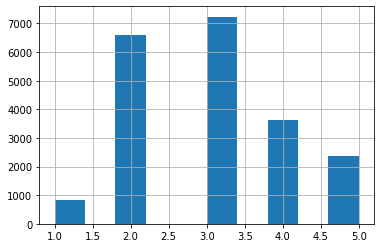

In [57]:
housing_df["income_cat"].hist()

In [58]:
from sklearn.model_selection import StratifiedShuffleSplit

In [59]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_df, housing_df["income_cat"]):
    strat_train_set = housing_df.loc[train_index]
    strat_test_set = housing_df.loc[test_index]
    
# what exactly is .loc of [train_index doing ] maybe setting it as whole row from the index , as loc takes whole row and 
#iloc takes index of loction 

In [60]:
strat_train_set

# looks like strat shuffle split works different than random and usualy gives index, and loc of index gives rows 
# good little trick to know 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3.0
...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND,4.0
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND,2.0
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND,3.0
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN,3.0


In [61]:
train_index

array([17606, 18632, 14650, ..., 13908, 11159, 15775])

In [65]:
#check strat 

strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

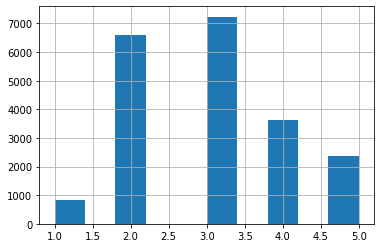

In [66]:
housing_df["income_cat"].hist()

In [69]:
# now remove income_cat attribute so data is back to original state

for set_ in(strat_train_set, strat_test_set):
    set_.drop("income_cat",axis =1, inplace = True)

    
# wtf is set_ ?? 

In [70]:
# if data super large usually take small set for deeper exploration

housing = strat_train_set.copy()

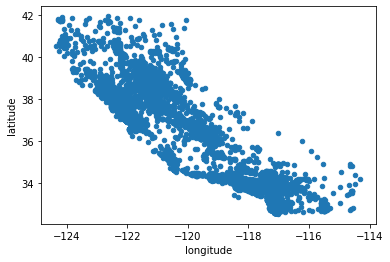

In [71]:
housing.plot(kind= "scatter", x="longitude", y="latitude")

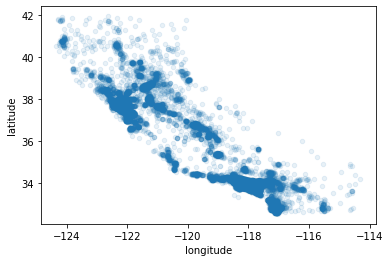

In [72]:
housing.plot(kind= "scatter", x="longitude", y="latitude", alpha=0.1)

#alpha to add vizulzation of density 

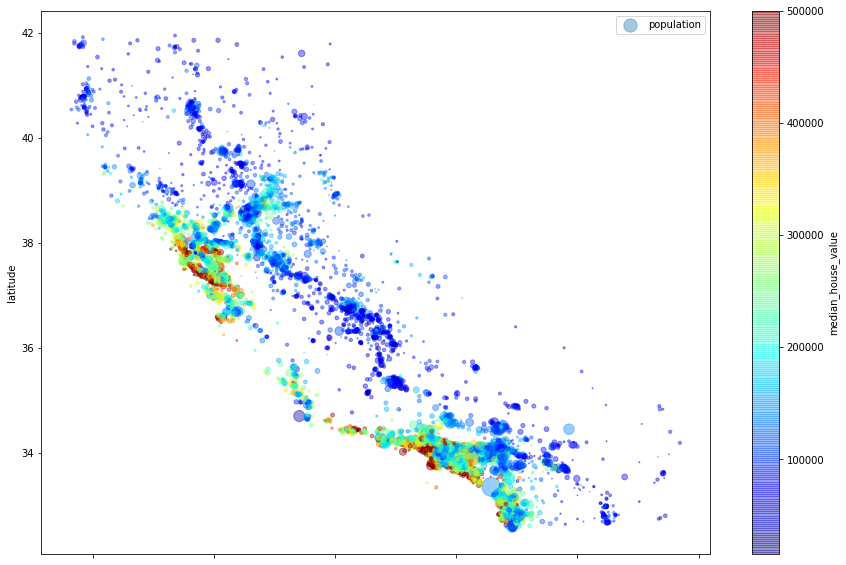

In [77]:
# s for radius c for color 
housing.plot(kind="scatter", x='longitude', y = 'latitude',alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(15,10),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

# jet is a predefined cmap color way put on top of "median_house_value which is the color = "

In [78]:
# can create standard correlation coefficint of pearsons r using corr method


corr_matrix=housing.corr()

In [80]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [ ]:
corr can only do linear relationships and there are other kinds out there so beware

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8de8dd4890>,
      dtype=object)

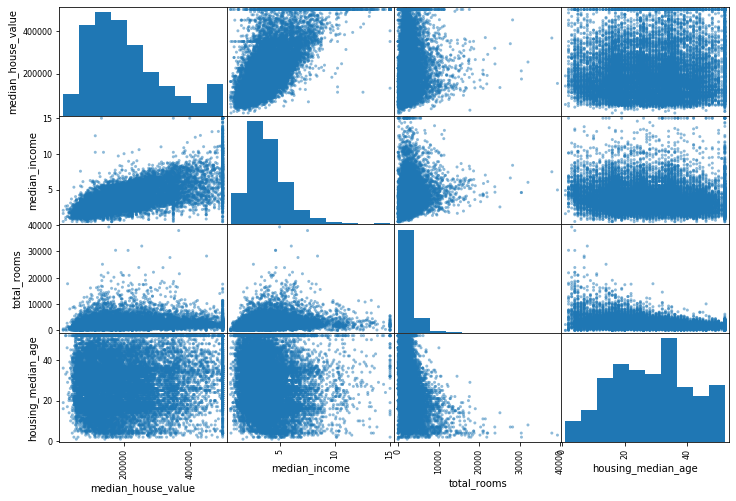

In [82]:
from pandas.plotting import scatter_matrix


attributes = ["median_house_value", 'median_income','total_rooms','housing_median_age']

scatter_matrix(housing[attributes],figsize=(12,8))